Air Traffic passenger


In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats
import numpy as np


file="Air_Traffic_Passenger_Statistics.csv"
df_air=pd.read_csv(file)
df_air.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [3]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              46670 non-null  int64 
 1   Operating Airline            46670 non-null  object
 2   Operating Airline IATA Code  46519 non-null  object
 3   Published Airline            46670 non-null  object
 4   Published Airline IATA Code  46519 non-null  object
 5   GEO Summary                  46670 non-null  object
 6   GEO Region                   46670 non-null  object
 7   Activity Type Code           46670 non-null  object
 8   Price Category Code          46670 non-null  object
 9   Terminal                     46670 non-null  object
 10  Boarding Area                46670 non-null  object
 11  Passenger Count              46670 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 4.3+ MB


In [4]:
df_air.describe()

,Activity Period,Passenger Count
count,46670.000000,46670.000000
mean,201323.079001,28852.816670
std,457.918639,60750.777914
min,200507.000000,1.000000
25%,200908.000000,4796.000000
50%,201311.000000,8796.000000
75%,201709.000000,19754.750000
max,202106.000000,659837.000000


In [5]:

df_air_col = df_air[['Activity Period', 'GEO Summary', 'GEO Region','Activity Type Code','Passenger Count']]
df_air_col.head()



,Activity Period,GEO Summary,GEO Region,Activity Type Code,Passenger Count
0,200507,Domestic,US,Deplaned,27271
1,200507,Domestic,US,Enplaned,29131
2,200507,Domestic,US,Thru / Transit,5415
3,200507,International,Canada,Deplaned,35156
4,200507,International,Canada,Enplaned,34090


In [6]:
air_2021_df=df_air[(df_air["Activity Period"]>= 202101) & (df_air["Activity Period"]<= 202106)]
             
air_2021_df.head()










,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
22869,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,7002
22870,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,4071
22871,202101,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,G,2119
22872,202101,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,1402
22873,202101,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,1594


In [7]:
df_air = air_2021_df.loc[air_2021_df["Activity Type Code"] == "Enplaned"]
air_2021_df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
22869,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Deplaned,Other,International,A,7002
22870,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,4071
22871,202101,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,International,G,2119
22872,202101,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,1402
22873,202101,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,1594


In [8]:
air_grouped = df_air.groupby(['Activity Period'])
air_grouped.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
22870,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,4071
22872,202101,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,1402
22874,202101,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,566
22876,202101,Air India Limited,AI,Air India Limited,AI,International,Asia,Enplaned,Other,International,G,6092
22878,202101,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,12755
22973,202102,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,1838
22975,202102,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,528
22977,202102,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,302
22979,202102,Air India Limited,AI,Air India Limited,AI,International,Asia,Enplaned,Other,International,G,6395
22981,202102,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,13064


In [9]:
air_table = df_air.groupby(['Activity Period'] + ['GEO Summary'])
air_table.head()




,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
22870,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,4071
22872,202101,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,1402
22874,202101,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,566
22876,202101,Air India Limited,AI,Air India Limited,AI,International,Asia,Enplaned,Other,International,G,6092
22878,202101,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,12755
22880,202101,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Enplaned,Other,Terminal 2,D,3404
22884,202101,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 1,B,30192
22896,202101,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,20663
22898,202101,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 2,D,9884
22902,202101,Frontier Airlines,F9,Frontier Airlines,F9,Domestic,US,Enplaned,Low Fare,International,A,4167


In [10]:
df_air_col = df_air[['Activity Period', 'GEO Summary', 'GEO Region','Activity Type Code','Passenger Count']]
df_air_col 

,Activity Period,GEO Summary,GEO Region,Activity Type Code,Passenger Count
22870,202101,International,Mexico,Enplaned,4071
22872,202101,International,Canada,Enplaned,1402
22874,202101,International,Europe,Enplaned,566
22876,202101,International,Asia,Enplaned,6092
22878,202101,Domestic,US,Enplaned,12755
...,...,...,...,...,...
46663,202106,International,Europe,Enplaned,10090
46665,202106,International,Mexico,Enplaned,2198
46666,202106,International,Mexico,Enplaned,419
46667,202106,International,Mexico,Enplaned,21468


In [11]:
df_air_col_grp=df_air_col.groupby(['Activity Period', 'GEO Summary']).sum()
df_air_col_grp

Passenger Count
Activity Period GEO Summary                   
202101          Domestic                621806
                International           116434
202102          Domestic                647526
                International            89744
202103          Domestic               1038872
                International           128172
202104          Domestic                670120
                International            65951
202105          Domestic                787048
                International            86897
202106          Domestic               1006372
                International           142970

<AxesSubplot:xlabel='Activity Period'>

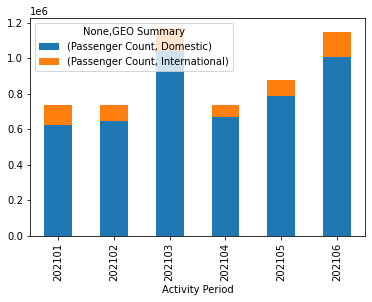

In [12]:
df_air_col_grp.unstack().plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Activity Period'>

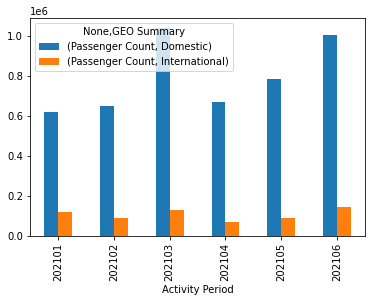

In [13]:
df_air_col_grp.unstack().plot(kind="bar")

In [14]:
df_air_col_grp.unstack()

Passenger Count              
GEO Summary            Domestic International
Activity Period                              
202101                   621806        116434
202102                   647526         89744
202103                  1038872        128172
202104                   670120         65951
202105                   787048         86897
202106                  1006372        142970

array([<AxesSubplot:ylabel='(Passenger Count, Domestic)'>,
       <AxesSubplot:ylabel='(Passenger Count, International)'>],
      dtype=object)

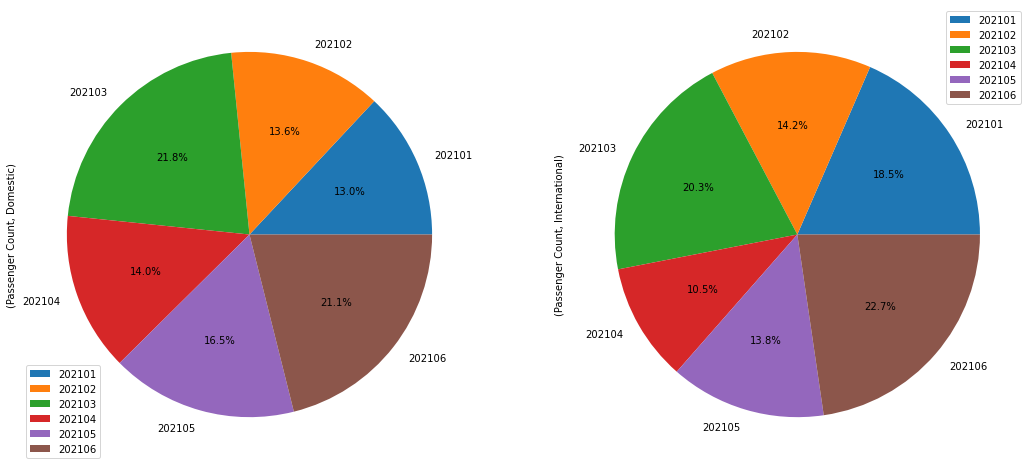

In [15]:
df_air_col_grp.unstack().plot(kind="pie",stacked=True,subplots=True,figsize=(18,18),autopct='%1.1f%%')


In [16]:
file="owid-covid-data.csv"
df_covid=pd.read_csv(file)
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [17]:
df_air.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
22870,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,4071
22872,202101,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,1402
22874,202101,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,566
22876,202101,Air India Limited,AI,Air India Limited,AI,International,Asia,Enplaned,Other,International,G,6092
22878,202101,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,12755


In [18]:
df_air["GEO Region"].unique()

array(['Mexico', 'Canada', 'Europe', 'Asia', 'US', 'Central America',
       'Middle East', 'Australia / Oceania'], dtype=object)

In [19]:
df_covid["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [20]:
df_covid["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [21]:
#replace united states from the covid data to US to be similar to the airline data
df_covid["location"]=df_covid["location"].replace("United States","US")


In [23]:
df_covid["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [24]:
#create a new colum has year and month only inside the covid data to be able to match agaist airline data
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161162 entries, 0 to 161161
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    161162 non-null  object 
 1   continent                                   151492 non-null  object 
 2   location                                    161162 non-null  object 
 3   date                                        161162 non-null  object 
 4   total_cases                                 158274 non-null  float64
 5   new_cases                                   158242 non-null  float64
 6   new_cases_smoothed                          157091 non-null  float64
 7   total_deaths                                140632 non-null  float64
 8   new_deaths                                  140807 non-null  float64
 9   new_deaths_smoothed                         140677 non-null  float64
 

In [25]:
df_covid["date"]=pd.to_datetime(df_covid["date"])

In [27]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161162 entries, 0 to 161161
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    161162 non-null  object        
 1   continent                                   151492 non-null  object        
 2   location                                    161162 non-null  object        
 3   date                                        161162 non-null  datetime64[ns]
 4   total_cases                                 158274 non-null  float64       
 5   new_cases                                   158242 non-null  float64       
 6   new_cases_smoothed                          157091 non-null  float64       
 7   total_deaths                                140632 non-null  float64       
 8   new_deaths                                  140807 non-null  float64      

In [32]:
df_covid["Activity Period"]=df_covid["date"].dt.to_period('M').dt.strftime('%Y%m')

In [33]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Activity Period
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,202002
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,202002
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,202002
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,202002
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,202002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161157,ZWE,Africa,Zimbabwe,2022-02-07,230402.0,0.0,105.143,5362.0,0.0,3.429,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,202202
161158,ZWE,Africa,Zimbabwe,2022-02-08,230603.0,201.0,107.429,5366.0,4.0,2.286,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,202202
161159,ZWE,Africa,Zimbabwe,2022-02-09,230740.0,137.0,104.000,5367.0,1.0,2.143,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,202202
161160,ZWE,Africa,Zimbabwe,2022-02-10,231040.0,300.0,124.286,5373.0,6.0,2.286,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,202202


In [37]:
df_covid_grouped=df_covid.groupby(['Activity Period', 'location'],as_index=False).sum()

In [38]:
df_covid_grouped

,Activity Period,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,202001,Argentina,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000,0.000,0.000,...,502.200,858.700,0.000,155.000,2376.77,26.195,-773.3,-2.94,-2.94,-16.956168
1,202001,Asia,3.839100e+04,9333.0,3.870714e+03,889.0,196.0,81.428,8.205,1.993,...,0.000,0.000,0.000,0.000,0.00,0.000,0.0,0.00,0.00,0.000000
2,202001,Australia,3.800000e+01,9.0,1.286000e+00,0.0,0.0,0.000,1.474,0.349,...,78.000,99.000,0.000,23.040,500.64,5.664,-532.6,-4.47,-0.48,-20.652843
3,202001,Cambodia,5.000000e+00,1.0,0.000000e+00,0.0,0.0,0.000,0.295,0.059,...,10.000,168.500,331.145,4.000,349.10,2.970,0.0,0.00,0.00,0.000000
4,202001,Canada,1.200000e+01,4.0,5.710000e-01,0.0,0.0,0.000,0.316,0.105,...,72.000,99.600,0.000,15.000,494.58,5.574,-742.4,-2.92,-2.05,-19.501988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,202202,Wallis and Futuna,4.994000e+03,0.0,0.000000e+00,77.0,0.0,0.000,450153.231,0.000,...,0.000,0.000,0.000,0.000,879.34,0.000,0.0,0.00,0.00,0.000000
5556,202202,World,4.353048e+09,29643613.0,3.055455e+07,63197656.0,125424.0,116044.859,552770.450,3764.284,...,70.774,380.985,661.430,29.755,798.38,8.107,0.0,0.00,0.00,0.000000
5557,202202,Yemen,1.244400e+05,640.0,5.481420e+02,22526.0,88.0,59.144,4081.253,20.991,...,83.600,321.200,544.962,7.700,727.32,5.170,0.0,0.00,0.00,0.000000
5558,202202,Zambia,3.379195e+06,3966.0,3.677143e+03,43223.0,19.0,22.143,178598.184,209.613,...,34.100,271.700,153.318,22.000,702.79,6.424,0.0,0.00,0.00,0.000000


In [39]:
df_air

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
22870,202101,Aeromexico,AM,Aeromexico,AM,International,Mexico,Enplaned,Other,International,A,4071
22872,202101,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,International,G,1402
22874,202101,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,566
22876,202101,Air India Limited,AI,Air India Limited,AI,International,Asia,Enplaned,Other,International,G,6092
22878,202101,Alaska Airlines,AS,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 2,D,12755
...,...,...,...,...,...,...,...,...,...,...,...,...
46663,202106,United Airlines,UA,United Airlines,UA,International,Europe,Enplaned,Other,International,G,10090
46665,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,International,G,2198
46666,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,E,419
46667,202106,United Airlines,UA,United Airlines,UA,International,Mexico,Enplaned,Other,Terminal 3,F,21468


In [43]:
df_air.info()
df_air["Activity Period"]=df_air["Activity Period"].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 22870 to 46669
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              470 non-null    int64 
 1   Operating Airline            470 non-null    object
 2   Operating Airline IATA Code  468 non-null    object
 3   Published Airline            470 non-null    object
 4   Published Airline IATA Code  468 non-null    object
 5   GEO Summary                  470 non-null    object
 6   GEO Region                   470 non-null    object
 7   Activity Type Code           470 non-null    object
 8   Price Category Code          470 non-null    object
 9   Terminal                     470 non-null    object
 10  Boarding Area                470 non-null    object
 11  Passenger Count              470 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 47.7+ KB


/var/folders/qh/k61w30g12s3_9xsxx643c22m0000gn/T/ipykernel_56193/827448710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air["Activity Period"]=df_air["Activity Period"].astype(str)


In [48]:
df_air_grp=df_air.groupby(["Activity Period","GEO Region"],as_index=False).sum()

In [49]:
df_merge=pd.merge(df_air_grp,df_covid_grouped,how='inner',left_on=["Activity Period","GEO Region"],right_on=["Activity Period","location"])
df_merge 

,Activity Period,GEO Region,Passenger Count,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,202101,Asia,53056,Asia,6.811262e+08,2397511.0,2.414653e+06,11037509.0,35473.0,35945.142,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.00,0.00,0.000000
1,202101,Canada,5738,Canada,2.157789e+07,195796.0,2.044410e+05,556264.0,4297.0,4293.430,...,372.0,514.6,0.000,77.50,2555.33,28.799,78248.5,25.24,26.90,2055.497500
2,202101,Europe,15528,Europe,8.513426e+08,6650788.0,6.857081e+06,19370670.0,158361.0,159464.285,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.00,0.00,0.000000
3,202101,Mexico,26380,Mexico,5.065233e+07,438166.0,4.275020e+05,4367196.0,32729.0,31509.857,...,213.9,663.4,2723.257,42.78,2326.55,24.149,1782691.9,220.72,657.87,13685.410091
4,202101,US,621806,US,7.339211e+08,6152180.0,6.401566e+06,12419521.0,96654.0,96665.430,...,592.1,762.6,0.000,85.87,2444.66,28.706,2585271.0,83.49,182.54,7765.557050
5,202102,Asia,43078,Asia,6.746762e+08,1909620.0,1.917242e+06,10828202.0,25657.0,26371.286,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.00,0.00,0.000000
6,202102,Canada,3858,Canada,2.314246e+07,86973.0,9.142586e+04,594402.0,1962.0,2215.430,...,336.0,464.8,0.000,70.00,2308.04,26.012,63807.6,18.87,-8.81,1676.151776
7,202102,Europe,11438,Europe,9.146233e+08,4067397.0,4.129152e+06,21495316.0,110724.0,116626.432,...,0.0,0.0,0.000,0.00,0.00,0.000,0.0,0.00,0.00,0.000000
8,202102,Mexico,21190,Mexico,5.567801e+07,222678.0,2.453897e+05,4863060.0,27179.0,28576.570,...,193.2,599.2,2459.716,38.64,2101.40,21.812,1737299.8,197.27,267.38,13336.942975
9,202102,US,647526,US,7.770093e+08,2408955.0,2.641506e+06,13604777.0,65786.0,69424.571,...,534.8,688.8,0.000,77.56,2208.08,25.928,2347543.6,69.64,66.24,7051.478841


In [50]:
df_merge_US=df_merge.loc[df_merge['location']=="US"]
df_merge_US

,Activity Period,GEO Region,Passenger Count,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
4,202101,US,621806,US,7.339211e+08,6152180.0,6401565.573,12419521.0,96654.0,96665.430,...,592.1,762.6,0.0,85.87,2444.66,28.706,2585271.0,83.49,182.54,7765.557050
9,202102,US,647526,US,7.770093e+08,2408955.0,2641506.285,13604777.0,65786.0,69424.571,...,534.8,688.8,0.0,77.56,2208.08,25.928,2347543.6,69.64,66.24,7051.478841
14,202103,US,1038872,US,9.198288e+08,1814397.0,1828376.569,16613608.0,37263.0,40258.431,...,592.1,762.6,0.0,85.87,2444.66,28.706,2418005.8,66.95,14.26,7263.131017
19,202104,US,670120,US,9.478092e+08,1889101.0,1916147.429,16932435.0,23893.0,24097.572,...,573.0,738.0,0.0,83.10,2365.80,27.780,2446543.8,63.64,15.74,7348.852579
24,202105,US,787048,US,1.023564e+09,922194.0,1046549.714,18143471.0,18371.0,19533.428,...,592.1,762.6,0.0,85.87,2444.66,28.706,3134310.0,76.52,32.14,9414.743413
29,202106,US,1006372,US,1.008013e+09,398304.0,402951.286,17997142.0,10530.0,11004.710,...,573.0,738.0,0.0,83.10,2365.80,27.780,2565360.2,59.09,22.35,7705.749605


<AxesSubplot:xlabel='Passenger Count', ylabel='new_cases'>

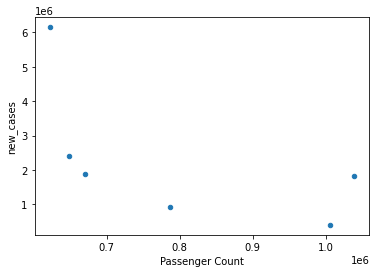

In [51]:
df_merge_US.plot(kind="scatter",x="Passenger Count",y="new_cases")


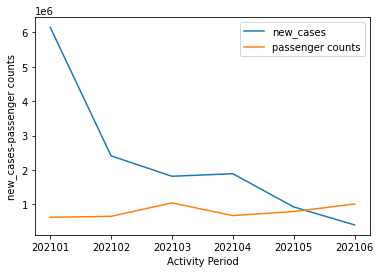

In [58]:
plt.plot(df_merge_US["Activity Period"],df_merge_US["new_cases"],label="new_cases")
plt.plot(df_merge_US["Activity Period"],df_merge_US["Passenger Count"],label="passenger counts")
plt.xlabel("Activity Period")
plt.ylabel("new_cases-passenger counts")
plt.legend()
plt.show()